# **Lab 6: Runge-Kutta 2nd Order Method for Ordinary Differential Equations**<br>

Ordinary Differential Equation (ODE) is a differential equation consisting of one or more functions of a single independent variable and the derivatives of those functions. Finding derivatives analytically is a complex procedure, involving a lot of rules. Computers and calculators find derivatives using some sort of numerical methods. Here, our target is to estimate a function at discrete points given its differential equation using the **Runge-Kutta 2nd Order method**. An important thing to note here is that this method can only solve first order ODE of the form $$ \frac{dy}{dx}=f(x,y), y(x_0)=y_0 $$

In today's lab, we will be implementing the **Runge-Kutta 2nd Order method** for solving a first order ODE in python. Refer to the example in the lecture slide.

The following is the problem you need to solve.
<br>
A ball at $1200K$ is allowed to cool down in air at an ambient temperature of $300K$. Assuming heat is lost only due to radiation, the differential equation for the temperature of the ball is given by $$\frac{d\theta}{dt}=-2.2067\times 10^{-12} (\theta^4 - 81 \times 10^8), y(0)=1,\theta(0)=1200K$$ where $\theta$ is in $K$ and $t$ in seconds. Find the temperature at $t=480$ seconds using Runge-Kutta 2nd Order method. Assume a step size of $h=240$ seconds. Compare with the exact value.

##Task 1
Implement the bivariate function $f(t, \theta)$ and the algorthim for Runge-Kutta 2nd Order method. Use the **Heun's method** assumption $\displaystyle a_2 = \frac{1}{2}$.
$$\theta_{i+1} = \theta_i + \left( \frac{1}{2}k_1 +  \frac{1}{2}k_2\right)h$$
$$k_1 = f(t_i,\theta_i)$$
$$k_2 = f(t_i + h, \theta_i + k_1h)$$ where $h=t_{i+1}-t_i$ is the step size.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
def f(t, theta):
    return -2.2067e-12 * (theta**4 - 81e8)

def RungeKutta2(t_0, theta_0, h, t_target):
    while t_0 < t_target:
        k1 = f(t_0, theta_0)
        k2 = f(t_0 + h, theta_0 + k1 * h)
        theta_0 = theta_0 + 0.5 * (k1 + k2) * h
        t_0 = t_0 + h

    return theta_0

t_0 = 0
theta_0 = 1200
h = 240
t_target = 480



In [ ]:
print(f'Temperature at t = 480s with step size h = 240s is {RungeKutta2(0,1200,240,480)}K')

Temperature at t = 480s with step size h = 240s is 584.2684867703111K


Your answer should be $\approx 584.27K$.

##Task 2
Calculate the exact solution of the ODE. It is the root of the nonlinear equation
$$ 0.92593\ln\left( \frac{\theta-300}{\theta+300} \right) - 1.8519\tan^{-1}(0.333\times10^{-2}\theta) = -0.22067\times 10^{-3}t - 2.9282 $$ at $t=480$ seconds.

You can use your own root-finding algorithm or you can use the `fsolve()` function from the `scipy` package. (https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html)

In [ ]:
# Write your code here.

from scipy.optimize import fsolve
import numpy as np

def equation_part1(theta):
    return 0.92593 * np.log((theta - 300)/(theta + 300))

def equation_part2(theta):
    return -1.8519 * np.arctan(0.333e-2 * theta)

def exact_equation(theta, t):
    return equation_part1(theta) + equation_part2(theta) + 0.22067e-3 * t + 2.9282



In [ ]:
t_target = 480

initial_guess = 1200

exact_solution = fsolve(lambda theta: exact_equation(theta, t_target), initial_guess)[0]

print(f"The exact temperature at t={t_target} seconds is approximately {exact_solution:.2f} K.")


The exact temperature at t=480 seconds is approximately 646.50 K.


The exact value should be $\theta_{exact} \approx 647.57K$.

Now, approximate the value of $\theta(480)$ using different step sizes, such as $480, 240, 120, 60,$ and $30$. Calculate the Global Truncation Error $E_t$ and the Absolute Relative True Error $|\epsilon_t|\%$ in each case.

In [ ]:
## Generating the exact solution

def exact_solution(t):
    return fsolve(lambda theta: exact_equation(theta, t), initial_guess)[0]


In [ ]:
t_target = 480
initial_guess = 1200


step_sizes = [480, 240, 120, 60, 30]


results = []


for h in step_sizes:
    approx_theta = RungeKutta2(0, 1200, h, t_target)
    exact_theta = exact_solution(t_target)


    global_truncation_error = exact_theta - approx_theta


    absolute_relative_true_error = abs((exact_theta - approx_theta) / exact_theta) * 100 if exact_theta != 0 else 0

    results.append({
        'Step Size': h,
        'Approx Theta': approx_theta,
        'Exact Theta': exact_theta,
        'Global Truncation Error': global_truncation_error,
        'Absolute Relative True Error (%)': absolute_relative_true_error
    })


for result in results:
    print(f"\nStep Size: {result['Step Size']} seconds")
    print(f"Approx Theta: {result['Approx Theta']:.4f} K")
    print(f"Exact Theta: {result['Exact Theta']:.4f} K")
    print(f"Global Truncation Error: {result['Global Truncation Error']:.4f} K")
    print(f"Absolute Relative True Error: {result['Absolute Relative True Error (%)']:.4f}%")



Step Size: 480 seconds
Approx Theta: -393.8695 K
Exact Theta: 646.4959 K
Global Truncation Error: 1040.3654 K
Absolute Relative True Error: 160.9237%

Step Size: 240 seconds
Approx Theta: 584.2685 K
Exact Theta: 646.4959 K
Global Truncation Error: 62.2274 K
Absolute Relative True Error: 9.6253%

Step Size: 120 seconds
Approx Theta: 651.3491 K
Exact Theta: 646.4959 K
Global Truncation Error: -4.8532 K
Absolute Relative True Error: 0.7507%

Step Size: 60 seconds
Approx Theta: 649.9136 K
Exact Theta: 646.4959 K
Global Truncation Error: -3.4177 K
Absolute Relative True Error: 0.5286%

Step Size: 30 seconds
Approx Theta: 648.2051 K
Exact Theta: 646.4959 K
Global Truncation Error: -1.7092 K
Absolute Relative True Error: 0.2644%


Your values should approximately match the values of this table.
<br>
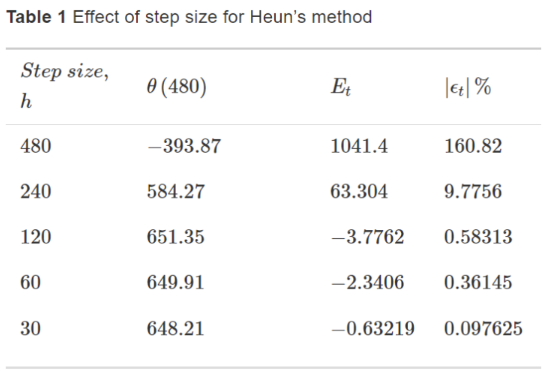

## Task 3
Generate a Temperature $(\theta)$ vs Step size $(h)$ plot which portrays the effect of step size in Runge-Kutta 2nd Order method. Use a different marker to represent the exact value.

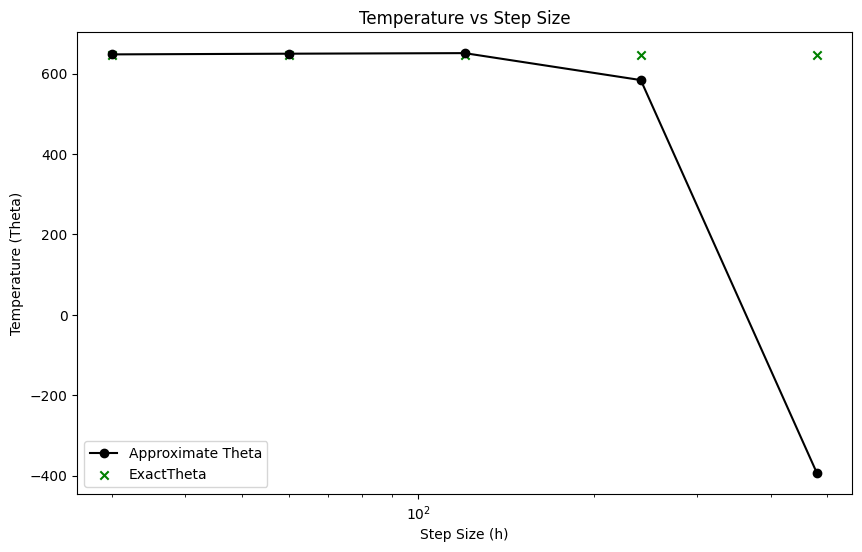

In [ ]:
# Write your code here.

step_sizes_plot = [result['Step Size'] for result in results]
approx_theta_plot = [result['Approx Theta'] for result in results]
exact_theta_plot = [result['Exact Theta'] for result in results]

plt.figure(figsize=(10, 6))
plt.plot(step_sizes_plot, approx_theta_plot, marker='o', label='Approximate Theta', color='black')
plt.scatter(step_sizes_plot, exact_theta_plot, marker='x', color='green', label='ExactTheta')

plt.title('Temperature vs Step Size')
plt.xlabel('Step Size (h)')
plt.ylabel('Temperature (Theta)')
plt.legend()
plt.xscale('log')
plt.show()

Your graph should look something like,
<br>
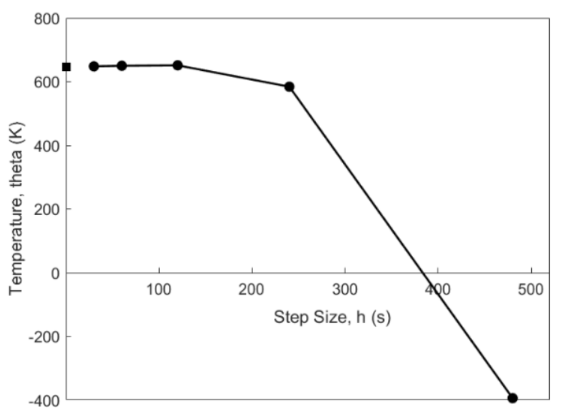

Genrerate a Temperature $\theta$ vs Time $t$ plot that compares the Runge-Kutta 2nd Order method approximations for different step sizes with the exact solution.

<ipython-input-33-da6fd766f55b>:7: RuntimeWarning: invalid value encountered in log
  return 0.92593 * np.log((theta - 300)/(theta + 300))


[{'Step Size': 480, 'Time Points': 480, 'Theta Values': -393.86949676856057}, {'Step Size': 240, 'Time Points': 480, 'Theta Values': 584.2684867703111}, {'Step Size': 120, 'Time Points': 480, 'Theta Values': 651.3490897129784}, {'Step Size': 60, 'Time Points': 480, 'Theta Values': 649.9135621424234}, {'Step Size': 30, 'Time Points': 480, 'Theta Values': 648.2051155772971}]


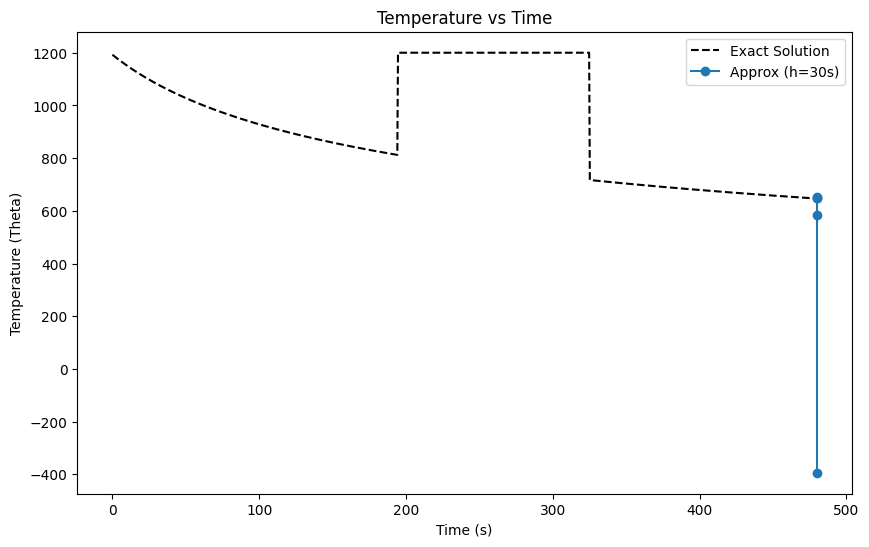

In [ ]:
# Write your code here.

t_target = 480
initial_guess = 1200


step_sizes = [480, 240, 120, 60, 30]


results = []

for h in step_sizes:
    theta_values = RungeKutta2(0, 1200, h, t_target)

    results.append({
        'Step Size': h,
        'Time Points': theta_values[1],
        'Theta Values': theta_values[0]
    })



plt.figure(figsize=(10, 6))


exact_time_points = np.linspace(0, t_target, 1000)
exact_theta_values = [exact_solution(t) for t in exact_time_points]
plt.plot(exact_time_points, exact_theta_values, label='Exact Solution', linestyle='--', color='black')

print(results)

result_time_points = []
result_theta_points = []
for result in results:
    result_time_points.append(result['Time Points'])
    result_theta_points.append(result['Theta Values'])

plt.plot(result_time_points, result_theta_points,  label=f'Approx (h={result["Step Size"]}s)', marker='o')

plt.title('Temperature vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Temperature (Theta)')
plt.legend()
plt.show()


Your graph should look something like,
<br>
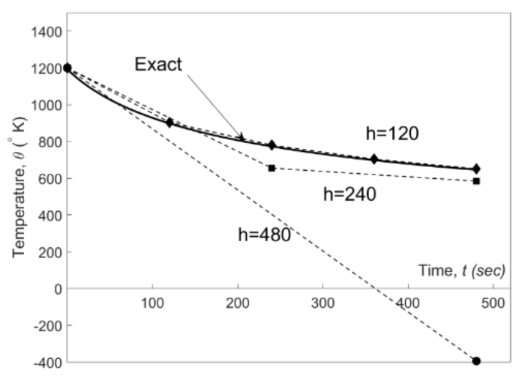